In [1]:
import my_module as mm
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

# categories = [
#     "anger",
#     "surprise",
#     "disgust",
#     "fear",
#     "neutral",
#     "happiness",
#     "sad",
# ]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories, limit = 1000)
# X, y = mm.read_pic(mm.pd.read_csv('data/500_picts_satz.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva, batch_size = 128)
print("Done")

Done


In [3]:
convs = [8, 16, 24, 32, 40]
fcs = [2048, 1024, 512, 64]
nets = []
for i in range(3, -1, -1):
    for j in range(1, 6):
        nets.append(mm.Net2(1, 350, 350, 8, convs[:j], fcs[i:]))
        print(f'Done with a CNN has {len(convs[:j])} convs layers and {len(fcs[i:])} linear layers')

Done with a CNN has 1 convs layers and 1 linear layers
Done with a CNN has 2 convs layers and 1 linear layers
Done with a CNN has 3 convs layers and 1 linear layers
Done with a CNN has 4 convs layers and 1 linear layers
Done with a CNN has 5 convs layers and 1 linear layers
Done with a CNN has 1 convs layers and 2 linear layers
Done with a CNN has 2 convs layers and 2 linear layers
Done with a CNN has 3 convs layers and 2 linear layers
Done with a CNN has 4 convs layers and 2 linear layers
Done with a CNN has 5 convs layers and 2 linear layers
Done with a CNN has 1 convs layers and 3 linear layers
Done with a CNN has 2 convs layers and 3 linear layers
Done with a CNN has 3 convs layers and 3 linear layers
Done with a CNN has 4 convs layers and 3 linear layers
Done with a CNN has 5 convs layers and 3 linear layers
Done with a CNN has 1 convs layers and 4 linear layers
Done with a CNN has 2 convs layers and 4 linear layers
Done with a CNN has 3 convs layers and 4 linear layers
Done with 

In [4]:
count = 0
DIR_PATH = './model/'
mm.os.makedirs(DIR_PATH, exist_ok = True)
for net in nets:
    if mm.torch.cuda.is_available():
        mm.torch.cuda.empty_cache()
        net.cuda()
    net = mm.train_process2(device, net, trainloader, LR = 1e-5, EPOCH = 10, PRINT = 5)
    count += 1
    PATH = DIR_PATH + "model_" + str(count) + ".pth"
    mm.torch.save(net.state_dict(), PATH)
    print(PATH, "done.")

CrossEntropyLoss()
[1,     5] loss: 2.035
[2,     5] loss: 1.882
[3,     5] loss: 1.882
[4,     5] loss: 1.893
[5,     5] loss: 1.882
[6,     5] loss: 1.892
[7,     5] loss: 1.869
[8,     5] loss: 1.857
[9,     5] loss: 1.883
[10,     5] loss: 1.834
Finished Training
./model/model_1.pth done.
CrossEntropyLoss()
[1,     5] loss: 1.872
[2,     5] loss: 1.705
[3,     5] loss: 1.705
[4,     5] loss: 1.712
[5,     5] loss: 1.715
[6,     5] loss: 1.719
[7,     5] loss: 1.732
[8,     5] loss: 1.743
[9,     5] loss: 1.705
[10,     5] loss: 1.724
Finished Training
./model/model_2.pth done.
CrossEntropyLoss()
[1,     5] loss: 1.886
[2,     5] loss: 1.902
[3,     5] loss: 1.901
[4,     5] loss: 1.871
[5,     5] loss: 1.891
[6,     5] loss: 1.871
[7,     5] loss: 1.887
[8,     5] loss: 1.910
[9,     5] loss: 1.893
[10,     5] loss: 1.899
Finished Training
./model/model_3.pth done.
CrossEntropyLoss()
[1,     5] loss: 2.054
[2,     5] loss: 1.911
[3,     5] loss: 1.766
[4,     5] loss: 1.738
[5,    

In [5]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5
Done for model 6
Done for model 7
Done for model 8
Done for model 9
Done for model 10
Done for model 11
Done for model 12
Done for model 13
Done for model 14
Done for model 15
Done for model 16
Done for model 17
Done for model 18
Done for model 19
Done for model 20


[0.47777777777777775, 0.4455555555555556, 0.6144444444444445, 0.4455555555555556, 0.44666666666666666, 0.4455555555555556, 0.4455555555555556, 0.4422222222222222, 0.4444444444444444, 0.4455555555555556, 0.4455555555555556, 0.4455555555555556, 0.4455555555555556, 0.44777777777777783, 0.4455555555555556, 0.4455555555555556, 0.44666666666666666, 0.4455555555555556, 0.4455555555555556, 0.44999999999999996]
[0.44999999999999996, 0.43999999999999995, 0.5800000000000001, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.43999999999999995, 0.45999999999999996]


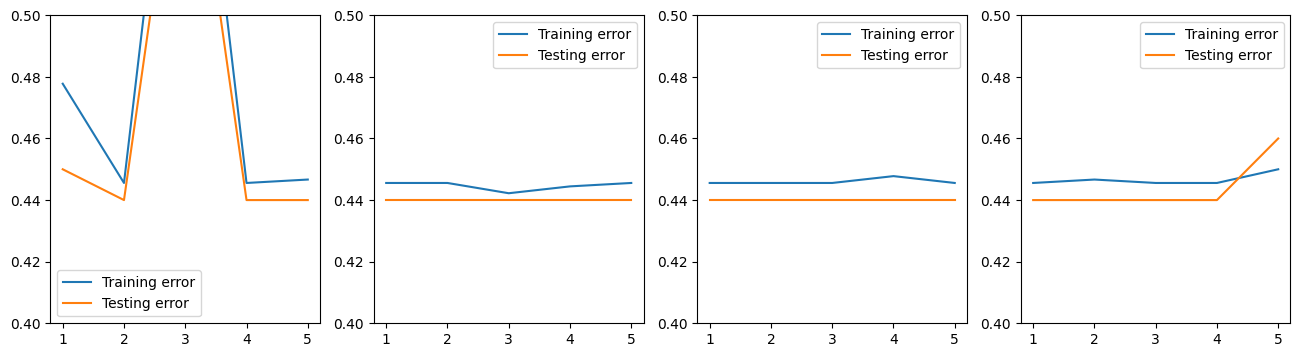

In [9]:
import matplotlib.pyplot as plt
from datetime import datetime

fig, ax = plt.subplots(1,4, figsize=(16,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4, 5]

for i in range(4):
    l = i * 5
    r = i * 5 + 5
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()
    ax[i].set_ylim(0.4, 0.5)

FIG_PATH = './plot/'
mm.os.makedirs(FIG_PATH, exist_ok = True)
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"report_test_{current_time}.png"
fig.savefig(FIG_PATH + filename)

CUDA out of memory with higher fliter:
OutOfMemoryError: CUDA out of memory. Tried to allocate 3.65 GiB. GPU 0 has a total capacty of 15.73 GiB of which 200.50 MiB is free. Process 377677 has 2.16 GiB memory in use. Process 442884 has 13.36 GiB memory in use. Of the allocated memory 12.82 GiB is allocated by PyTorch, and 327.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

The conv(4) and fc(3) seems like getting the highest gap between training error and testing error. Let's see in beta test.